In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants.constants as cst
from scipy.optimize import curve_fit

## Champs magnétiques induits par des bobines

In [113]:
## Paramètres

I = 5 # ampères
N = 95 # nombres de spires
R = 6.5*1e-2 # m
#print(cst.mu_0)


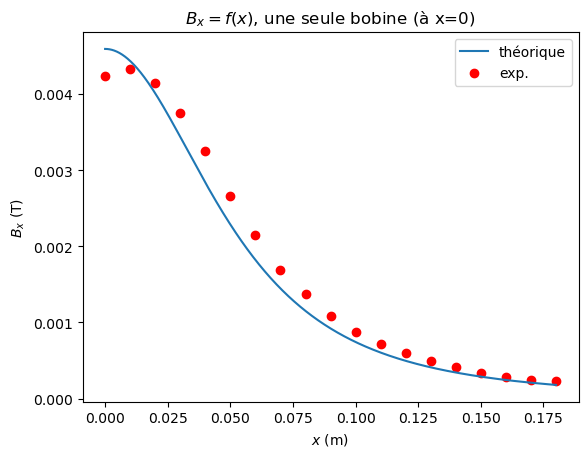

In [114]:

x_exp = np.array([i*1e-2 for i in range(0, 19)])
Bx_exp = np.array([-4.24, -4.33, -4.15, -3.75, -3.25, -2.66, -2.15, -1.69, -1.38, -1.09, -0.87, -0.72, -0.60, -0.50, -0.41, -0.34, -0.28, -0.24, -0.23]) * 1e-3

x = np.linspace(0, 18*1e-2, 1000)

Bx = cst.mu_0*I*N/2 * R**2/((R**2 + x**2)**(3/2))

plt.plot(x, Bx, label="théorique")
plt.scatter(x_exp, -Bx_exp, color="r", label="exp.") # axes Ox avec direction différentes
plt.legend()

plt.ylabel("$B_x$ (T)")
plt.xlabel("$x$ (m)")
plt.title('$B_x = f(x)$, une seule bobine (à x=0)')

plt.show()

#plt.scatter(x, 1/x**3)
#plt.ylim((0, 0.005))





In [115]:
delta_x = 1e-2

# integration par quadrature
C = -2*delta_x*(0.5*Bx_exp[0] + np.sum(Bx_exp[1:-1]))

print("Circulation experimentale :", C) 
print("Circulation théorique :", cst.mu_0*I*N)

Circulation experimentale : 0.0006106000000000001
Circulation théorique : 0.000596902604507


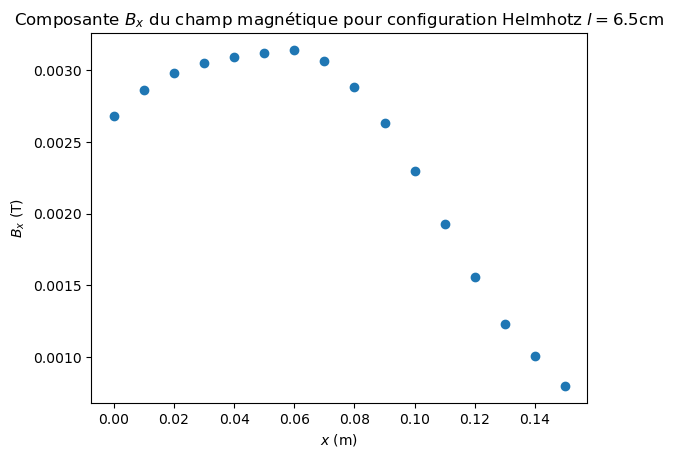

In [116]:
Bx_helm = np.array([2.68, 2.86, 2.98, 3.05, 3.09, 3.12, 3.14, 3.06, 2.88, 2.63, 2.30, 1.93, 1.56, 1.23, 1.01, 0.80])*1e-3

x_helm = np.array([i*1e-2 for i in range(0, 16)])


l = R

Bx_theo_centre = cst.mu_0*I*N/2 * 16*R**3/((4*R**2 + l**2)**(3/2))

plt.scatter(x_helm, Bx_helm)
#plt.axvline(6.5*1.e-2, c="k", label="$x=l$")
#plt.axhline(Bx_theo_centre)
plt.title("Composante $B_x$ du champ magnétique pour configuration Helmhotz $l = 6.5$cm")
#plt.legend()

plt.ylabel("$B_x$ (T)")
plt.xlabel("$x$ (m)")


plt.show()

## Condensateur plan

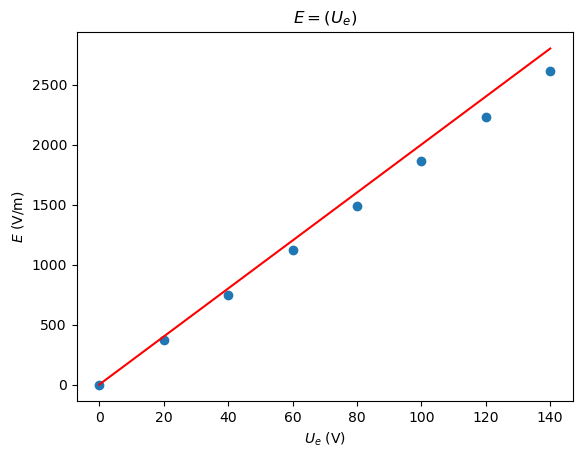

1.0


In [117]:
d_cst = 5*1e-2

Ue_exp = np.arange(0, 141, 20)
E_exp = np.array([0, 374, 744, 1120, 1490, 1860, 2230, 2610])
#print(Ue_exp)
Ue_theo = np.linspace(0, 140, 1000)
E_theo = Ue_theo/d_cst

plt.scatter(Ue_exp, E_exp)
plt.plot(Ue_theo, E_theo, c="r")

plt.xlabel("$U_e$ (V)")
plt.ylabel("$E$ (V/m)")
plt.title('$E = (U_e)$')



plt.show()

print((Ue_exp[-1]-Ue_exp[0])/140)



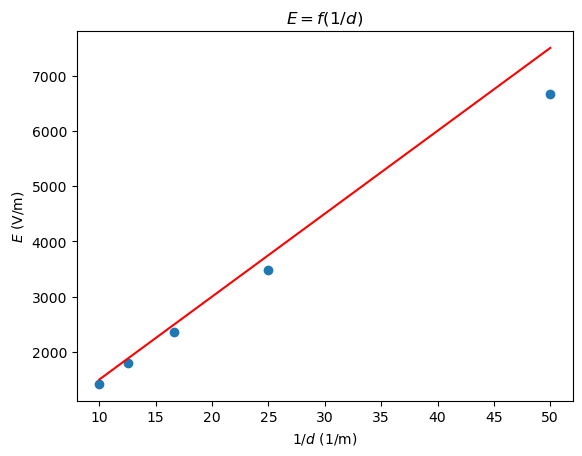

In [118]:
d_exp = np.arange(2, 11, 2)*1e-2
#print(d_exp)
E_exp2 = np.array([6660, 3480, 2360, 1800, 1420])

plt.scatter(1/d_exp, E_exp2)
plt.plot(1/d_exp, 150/d_exp, c="r") # U_e = 150 V

plt.xlabel("$1/d$ (1/m)")
plt.ylabel("$E$ (V/m)")
plt.title('$E = f(1/d)$')

plt.show()

In [119]:
print(cst.epsilon_0)

8.8541878128e-12


## Champ Magnétique Terrestre

5.196601636106557e-11


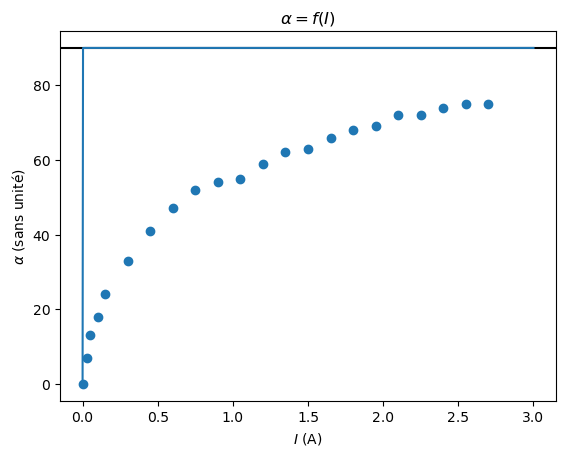

In [120]:
I_theo = np.linspace(0, 3, 1000)

I_exp = np.array([0, 0.03, 0.05, 0.10, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1.05, 1.20, 1.35, 1.50, 1.65, 1.80, 1.95, 2.10, 2.25, 2.40, 2.55, 2.70])
alpha_exp = np.array([0, 7, 13, 18, 24, 33, 41, 47, 52, 54, 55, 59, 62, 63, 66, 68, 69, 72, 72, 74, 75, 75])


plt.scatter(I_exp, alpha_exp)
plt.axhline(90, c="k")

def alpha_model(I, B_H):
    N = 20
    R = 0.2
    return np.arctan(1/B_H*(N*cst.mu_0/(2*R))*I)

sig = np.ones((len(I_exp)))
popt, pcov = curve_fit(f=alpha_model, xdata=I_exp, ydata=alpha_exp, sigma=sig)
B_H = popt[0]

print(B_H)
plt.plot(I_theo, np.rad2deg(alpha_model(I_theo, B_H)))
plt.title(r'$\alpha = f(I)$')
plt.xlabel("$I$ (A)")
plt.ylabel(r"$\alpha$ (sans unité)")
plt.show()

B_h curvefit 1.7465684703821579e-06
B_h fit manuel 4.278e-05


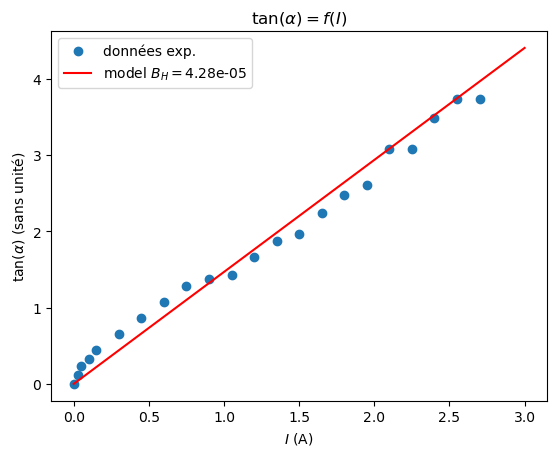

In [121]:
tan_alpha_exp = np.tan(np.deg2rad(alpha_exp))

plt.scatter(I_exp, tan_alpha_exp, label="données exp.")

def tan_alpha_model(I, B_H):
    N = 20
    R = 0.2
    return 1/B_H * (N*cst.mu_0/(2*R)) * I



popt, pcov = curve_fit(f=tan_alpha_model, xdata=I_exp, ydata=alpha_exp, sigma=sig)
B_H_2 = popt[0]

B_H_main = 4.278e-5
print("B_h curvefit", popt[0])
print("B_h fit manuel", B_H_main)
plt.plot(I_theo, tan_alpha_model(I_theo, B_H_main), c="red", label=f"model $B_H=${B_H_main:.3}")
plt.legend()
plt.xlabel("$I$ (A)")
plt.ylabel(r"$\tan(\alpha)$ (sans unité)")
plt.title(r'$\tan(\alpha) = f(I)$')
plt.show()

Quelque chose cloche avec curve_fit. On a trouvé une bonne valeur pour $B_H$ à la main ($B_H \approx 4.28\times10^{-5} T$).

## Étude Rheographique

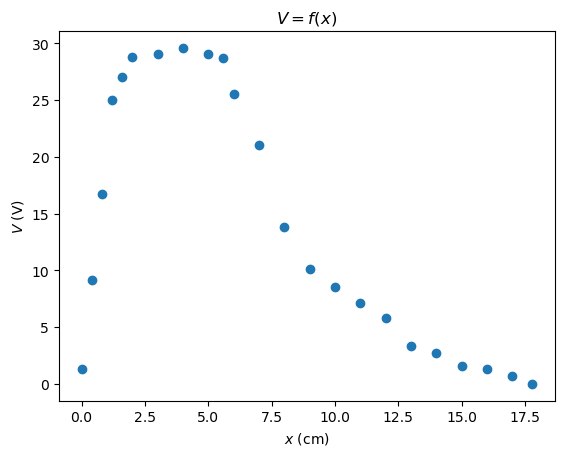

In [122]:
x_exp = np.array([0, 0.4, 0.8, 1.2, 1.6, 2.0, 3.0, 4.0, 5.0, 5.6, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 17.8])
V_exp = np.array([1.29, 9.14, 16.75, 25.00, 27.07, 28.81, 29.08, 29.60, 29.10, 28.71, 25.51, 21.01, 13.79, 10.10, 8.55, 7.15, 5.85, 3.35, 2.71, 1.55, 1.28, 0.66, 0.0])

#print(len(x_exp))
#print(len(V_exp))
plt.scatter(x_exp, V_exp)

x_theo = np.linspace(0.1, 18)
#plt.plot(x_theo, 8/(x_theo-9))

plt.xlabel("$x$ (cm)")
plt.ylabel("$V$ (V)")
plt.title('$V = f(x)$')

plt.show()

21


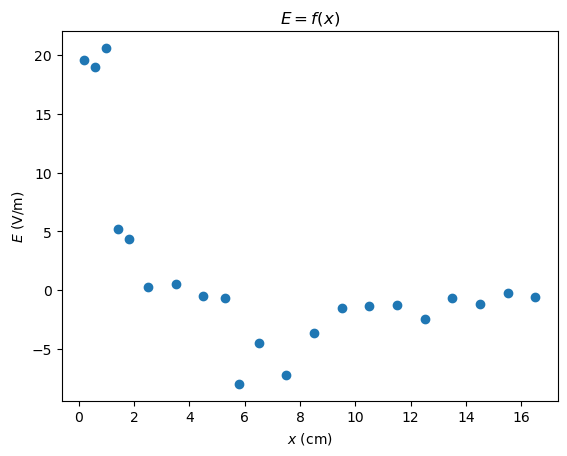

In [123]:

E_exp_2 = np.zeros(len(x_exp)-2)
x_exp_2 = np.zeros(len(x_exp)-2)
for i in range(len(x_exp)-2):
    E_exp_2[i] = (V_exp[i+1]-V_exp[i])/(x_exp[i+1]-x_exp[i])
    x_exp_2[i] = (x_exp[i+1]+x_exp[i])/2

print(len(E_exp_2))

#print(len(x_exp_2))
plt.scatter(x_exp_2, E_exp_2)

plt.xlabel("$x$ (cm)")
plt.ylabel("$E$ (V/m)")
plt.title('$E = f(x)$')
plt.show()
#print(x_exp)
#for i in range(len(E_exp_2)):
#    print(f"x={x_exp_2[i]}, E={E_exp_2[i]}")

méthode très peu précise car les deltas x sont trop grands
le résultat a (avec un peu d'imagination) la bonne allure mais n'est pas vraiment satisfaisant

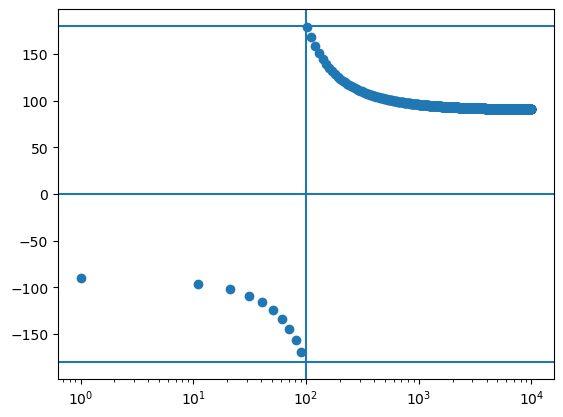

In [14]:
w_0 = 1e2
w = np.linspace(1, 1e4, 1000)
H_0 = -1
H = H_0 / (1 + 1j*(w/w_0 - w_0/w))
phase = np.angle(H)

plt.axhline(0)
plt.axvline(1e2)
plt.axhline(180)
plt.axhline(-180)
plt.xscale("log")
plt.scatter(w, np.rad2deg(phase))
plt.show()
